<img src="http://vision.skills.network/logo-light.png" width="400" alt="CV Studio logo"  />


<h2>Transfer Learning with Convolutional Neural Networks For Classification with PyTorch and   <a href="https://vision.skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-cvstudio-2021-01-01"> Computer Vision Learning 
Studio
 (CV Studio)</a></h2> <p><b> V 0.2</b></p>
<h4>Project: Chest_X-Ray_Images_Pneumonia_Classification</h4>
<h4>Training Run: Train</h4>


## Objectives


In this lab we will make classifier via <a href="https://vision.skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-cvstudio-2021-01-01">CV Studio</a>, CV Studio is a fast, easy and collaborative open source image annotation tool for teams and individuals. 

It is common to pretrain a ConvNet on a very large dataset in the lab, then use this Network to train your model. We have used the Convolutional Network as a feature generator, only training the output layer. Usually, the more images you add, the better your results, but <b>it takes longer and the rate of improvement will decrease</b>.


*   Import Libraries and Define Auxiliary Functions
*   Create Dataset Object
*   Load Model and Train


***


## Import Libraries and Define Auxiliary Functions


If you do not have PyTorch and skillsnetwork libraries, you can download them with these codes. All you need to do is uncomment them.

In [1]:
# !conda install -c pytorch torchvision

# !pip install skillsnetwork tqdm

# !pip install  skillsnetwork

Libraries for OS and Cloud


In [2]:
import os
import uuid
import shutil
import json
from botocore.client import Config
import ibm_boto3
import copy
from datetime import datetime
from skillsnetwork import cvstudio 

Libraries for Data Processing and Visualization


In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from matplotlib.pyplot import imshow
from tqdm import tqdm
from ipywidgets import IntProgress
import time 

Deep Learning Libraries


In [4]:
import torch
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader,random_split
from torch.optim import lr_scheduler
from torchvision import transforms
import torch.nn as nn
torch.manual_seed(0)

Plot the transformed image:


In [7]:
def imshow_(inp, title=None):
    """Imshow for Tensor."""
    inp = inp .permute(1, 2, 0).numpy()
    print(inp.shape)
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)

    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)
    plt.show()

Compare the prediction and actual value:


In [8]:
def result(model, x, y):
    z = model(x.unsqueeze_(0))
    _, yhat = torch.max(z.data, 1)
    if yhat.item() != y:
        text = "predicted: {} actual: {}".format(str(yhat.item()), y)
        print(text)

Define our device as the first visible cuda device if we have CUDA available:


In [9]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("the device type is", device)

the device type is cpu


## Load Data


In this section, we will preprocess our dataset by changing the shape of the image, transforming it to a tensor, and normalizing the image channels. These are the default preprocessing steps for image data. We will also perform data augmentation on the training dataset.


<code>
<p>mean = [0.485, 0.456, 0.406]</p>
<p>std = [0.229, 0.224, 0.225]</p>
<p>composed = transforms.Compose([transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),transforms.RandomRotation(degrees=5)
                               , transforms.ToTensor()
                               , transforms.Normalize(mean, std)])</p>
    </code>


Download the data:


In [10]:
# Get the Dataset
# Initialize the CV Studio Client
cvstudioClient = cvstudio.CVStudio()
# # Download All Images
cvstudioClient.downloadAll()

100%|██████████| 468/468 [01:38<00:00,  4.77it/s]


We need to get our training and validation dataset. 90% of the data will be used for training.


In [11]:
percentage_train = 0.9
train_set = cvstudioClient.getDataset(train_test='train',percentage_train=percentage_train)
val_set = cvstudioClient.getDataset(train_test='test',percentage_train=percentage_train)

defult transform for pretrained model resnet18
this is the training set
defult transform for pretrained model resnet18
this is the test set


We can plot some of our dataset:


(224, 224, 3)


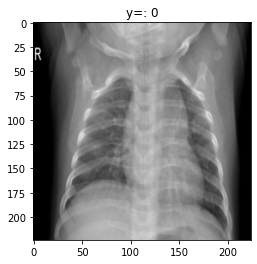

(224, 224, 3)


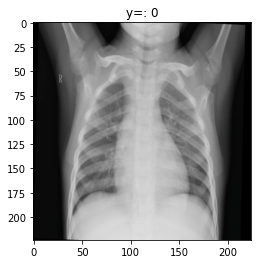

(224, 224, 3)


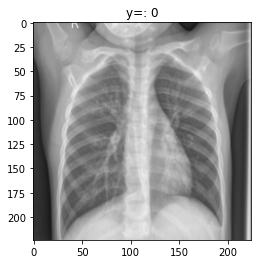

In [12]:
i = 0
for x, y in val_set:
    imshow_(x, "y=: {}".format(str(y.item())))
    i += 1
    if i == 3:
        break

## Hyperparameters


Experiment with different hyperparameters:


<b>Epoch</b> indicates the number of passes of the entire training dataset. We will make 10 epochs for your project:


In [13]:
n_epochs = 10

<b>Batch size</b> is the number of training samples utilized in one iteration.

In [14]:
batch_size = 32

<b>Learning rate</b> is a hyperparameter with a small positive value, often in the range between 0.0 and 1.0.

In [15]:
lr = 0.000001

<b>Momentum</b> is a term used in the gradient descent algorithm to improve training results:


In [16]:
momentum=0.9

If you set to <code>lr_scheduler=True</code>  for every epoch use a learning rate scheduler changes the range of the learning rate from a maximum or minimum value. The learning rate usually decays over time.


In [17]:
lr_scheduler = True
base_lr = 0.001
max_lr = 0.01

# Load Model and Train


This function will train the model


In [18]:
def train_model(model, train_loader, validation_loader, criterion, optimizer, n_epochs, print_=True):
    loss_list = []
    accuracy_list = []
    correct = 0
    n_test = len(val_set)
    accuracy_best = 0
    best_model_wts = copy.deepcopy(model.state_dict())
    print("The first epoch should take several minutes")
    for epoch in tqdm(range(n_epochs)):

        loss_sublist = []
        # Loop through the data in loader

        for x, y in train_loader:
            x, y = x.to(device), y.to(device)
            model.train()

            z = model(x)
            loss = criterion(z, y)
            loss_sublist.append(loss.data.item())
            loss.backward()
            optimizer.step()

            optimizer.zero_grad()
        print("epoch {} done".format(epoch))

        scheduler.step()
        loss_list.append(np.mean(loss_sublist))
        correct = 0

        for x_test, y_test in validation_loader:
            x_test, y_test = x_test.to(device), y_test.to(device)
            model.eval()
            z = model(x_test)
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
        accuracy = correct / n_test
        accuracy_list.append(accuracy)
        if accuracy > accuracy_best:
            accuracy_best = accuracy
            best_model_wts = copy.deepcopy(model.state_dict())

        if print_:
            print('learning rate', optimizer.param_groups[0]['lr'])
            print("The validaion  Cost for each epoch " + str(epoch + 1) + ": "
                  + str(np.mean(loss_sublist)))
            print("The validation accuracy for epoch " + str(epoch + 1) + ": "
                  + str(accuracy))
    model.load_state_dict(best_model_wts)
    return accuracy_list, loss_list, model

Load the pre-trained model resnet18. Set the parameter pretrained to true.


In [19]:
model = models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /home/jupyterlab/.cache/torch/checkpoints/resnet18-5c106cde.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

We will only train the last layer of the network set the parameter <code>requires_grad</code> to <code>False</code>, the network is a fixed feature extractor.


In [20]:
 for param in model.parameters():
        param.requires_grad = False
    

Number of classes


In [21]:
n_classes=train_set.n_classes
n_classes

2

Replace the output layer model.fc of the neural network with a nn.Linear object, to classify <code>n_classes</code> different classes. For the parameters in_features  remember the last hidden layer has 512 neurons.


In [22]:
# Type your code here
model.fc = nn.Linear(512, n_classes)

Set device type


In [23]:
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Cross-entropy loss, or log loss, measures the performance of a classification model combines LogSoftmax in one object class. It is useful when training a classification problem with C classes.


In [24]:
criterion = nn.CrossEntropyLoss()

Create a training loader and validation loader object.


In [25]:

train_loader = torch.utils.data.DataLoader(dataset=train_set , batch_size=batch_size,shuffle=True)
validation_loader= torch.utils.data.DataLoader(dataset=val_set , batch_size=1)

Use the optim package to define an Optimizer that will update the weights of the model for us.


In [26]:
optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=momentum)


We use <a href='https://arxiv.org/pdf/1506.01186.pdf?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-cvstudio-2021-01-01'>Cyclical Learning Rates</a>


In [27]:
if lr_scheduler:
    scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.001, max_lr=0.01,step_size_up=5,mode="triangular2")

Now we are going to train model.


In [28]:
start_datetime = datetime.now()
start_time=time.time()

accuracy_list,loss_list, model=train_model(model,train_loader , validation_loader, criterion, optimizer, n_epochs=n_epochs)

end_datetime = datetime.now()
current_time = time.time()
elapsed_time = current_time - start_time
print("elapsed time", elapsed_time )

  0%|          | 0/10 [00:00<?, ?it/s]

The first epoch should take several minutes
epoch 0 done


 10%|█         | 1/10 [02:38<23:48, 158.68s/it]

learning rate 0.002800000000000002
The validaion  Cost for each epoch 1: 0.68860981294087
The validation accuracy for epoch 1: 0.5106382978723404
epoch 1 done


 20%|██        | 2/10 [05:15<21:03, 157.88s/it]

learning rate 0.0046
The validaion  Cost for each epoch 2: 0.4661419838666916
The validation accuracy for epoch 2: 0.8936170212765957
epoch 2 done


 30%|███       | 3/10 [07:58<18:38, 159.79s/it]

learning rate 0.006400000000000001
The validaion  Cost for each epoch 3: 0.33279756030866076
The validation accuracy for epoch 3: 0.6808510638297872
epoch 3 done


 40%|████      | 4/10 [10:35<15:54, 159.03s/it]

learning rate 0.008199999999999999
The validaion  Cost for each epoch 4: 0.39122678259653704
The validation accuracy for epoch 4: 0.6808510638297872
epoch 4 done


 50%|█████     | 5/10 [13:16<13:17, 159.47s/it]

learning rate 0.010000000000000002
The validaion  Cost for each epoch 5: 0.42777919875723974
The validation accuracy for epoch 5: 0.6170212765957447
epoch 5 done


 60%|██████    | 6/10 [15:52<10:33, 158.47s/it]

learning rate 0.008199999999999999
The validaion  Cost for each epoch 6: 0.3702836845602308
The validation accuracy for epoch 6: 0.8723404255319149
epoch 6 done


 70%|███████   | 7/10 [18:32<07:56, 158.97s/it]

learning rate 0.006400000000000001
The validaion  Cost for each epoch 7: 0.399450578593782
The validation accuracy for epoch 7: 0.8936170212765957
epoch 7 done


 80%|████████  | 8/10 [21:10<05:17, 158.74s/it]

learning rate 0.0046
The validaion  Cost for each epoch 8: 0.36383555989180294
The validation accuracy for epoch 8: 0.8936170212765957
epoch 8 done


 90%|█████████ | 9/10 [23:47<02:37, 157.98s/it]

learning rate 0.002800000000000002
The validaion  Cost for each epoch 9: 0.31677137155617985
The validation accuracy for epoch 9: 0.8936170212765957
epoch 9 done


100%|██████████| 10/10 [26:30<00:00, 159.03s/it]

learning rate 0.001
The validaion  Cost for each epoch 10: 0.18419520423880645
The validation accuracy for epoch 10: 0.8936170212765957
elapsed time 1590.4308874607086


Now run the following to report back the results of the training run to CV Studio


In [29]:
parameters = {
    'epochs': n_epochs,
    'learningRate': lr,
    'momentum': momentum,
    'percentage used training': percentage_train,
    "learningRatescheduler": {"lr_scheduler": lr_scheduler, "base_lr": base_lr, 
                              "max_lr": max_lr}
}

result = cvstudioClient.report(started=start_datetime,
                               completed=end_datetime,
                               parameters=parameters,
                               accuracy={'accuracy': accuracy_list,
                                         'loss': loss_list})
if result.ok:
    print('Congratulations your results have been reported back to CV Studio!')

Congratulations your results have been reported back to CV Studio!


Save the model to model.pt


In [30]:
# Save the model to model.pt
torch.save(model.state_dict(), 'model.pt')

# Save the model and report back to CV Studio
result = cvstudioClient.uploadModel('model.pt', {'numClasses': n_classes})

File Uploaded


Plot train cost and validation accuracy,  you can improve results by getting more data.


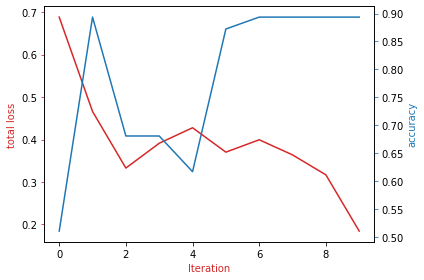

In [31]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list, color=color)
ax1.set_xlabel('Iteration', color=color)
ax1.set_ylabel('total loss', color=color)
ax1.tick_params(axis='y', color=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)
ax2.plot(accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()
plt.show()

Load the model that performs best:


In [32]:
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(512, n_classes)
model.load_state_dict(torch.load("model.pt"))
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  